In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error



# **Importing Dataset**

In [0]:
housedata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kc_house_data.csv')


In [0]:
housedata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data From Site

In [0]:
housedata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Shape Returns Dimension of Array, our dataset

In [0]:
housedata.shape

(21613, 21)

Check if there are any missing values in our dataset

In [0]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Plotting barplotting with values sqft living against prices to get an overview of how the price changes with sqft.

No handles with labels found to put in legend.


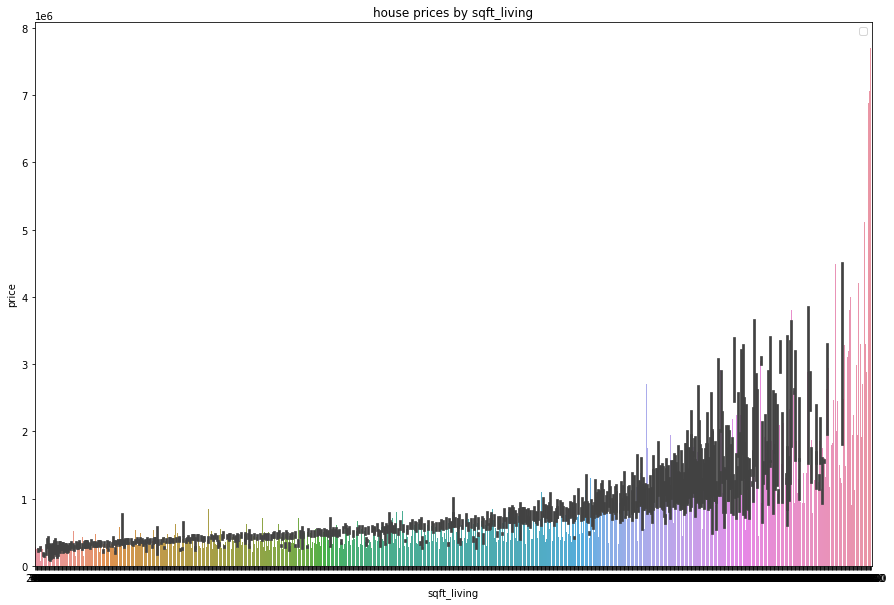

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=housedata)

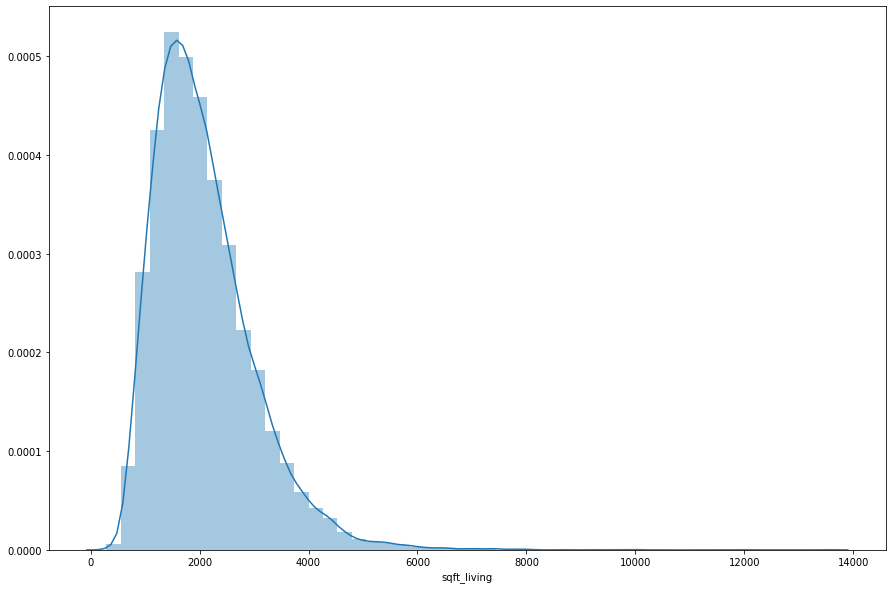

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(housedata['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

In [0]:
print('Mean',round(housedata['sqft_living'].mean(),2))
print('Median',housedata['sqft_living'].median())
print('Mode',housedata['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [0]:
prices = housedata['price']
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
print("Price statistics for housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))


Price statistics for housing dataset:

Minimum price: $75000.0
Maximum price: $7700000.0
Mean price: $540088.1417665294
Median price $450000.0
Standard deviation of prices: $367118.7031813722


# **Correlation Heatmap**
Visualizing the correlation between variables in our set thus we can the price is dependent on various features like bedrooms, bathrooms, sqft_living, sqft_lot, floors etc


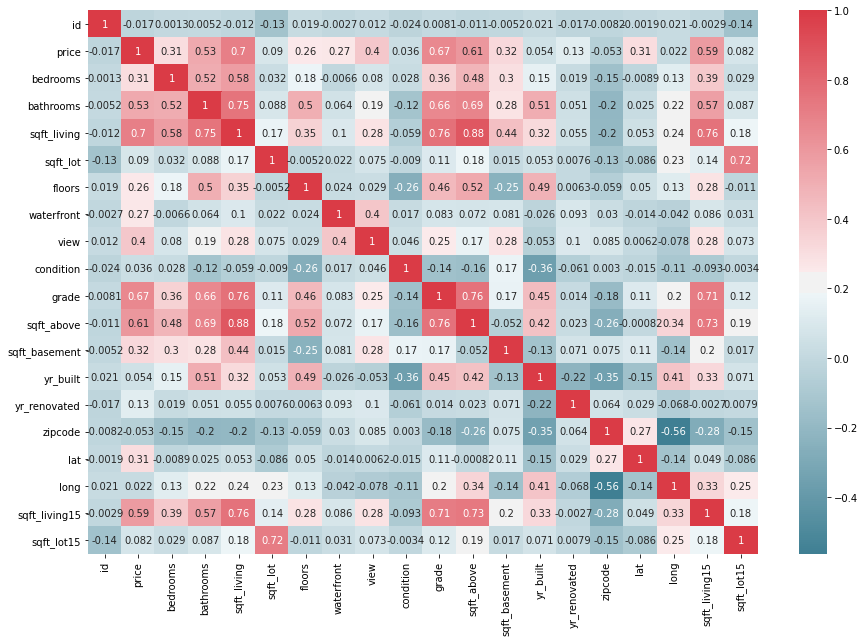

In [0]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(housedata.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(housedata)

Scatterplot matrix allows us to visualize the pair-wise relationships and correlations between the different features

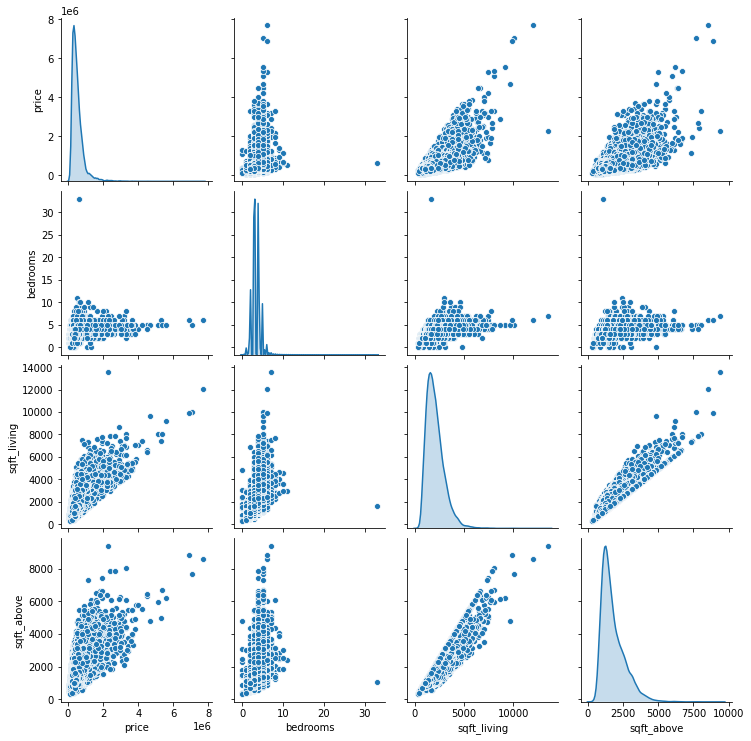

In [0]:
sns.pairplot(housedata[["price", "bedrooms", "sqft_living", "sqft_above"]], diag_kind="kde")

# **Simple Linear Regression**


Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:

One variable, denoted x, is regarded as the predictor, explanatory, or independent variable, in our case it is the Sqft_Living. 
The other variable, denoted y, is regarded as the response, outcome, or dependent variable and for us it is our Price.

This can be represented mathematically as
**y = β0 + β1x+ e;**

y is the output variable (house prices)

x is the input variable (Sqft_Living)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

calling  train_test_split functio to split the data into 80:20 ratio of which train_size is 80%, test_size is 20%. train_test_split splits arrays or matrices into random train and test subsets

In [0]:
train_data,test_data=train_test_split(housedata,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression() 

In [0]:
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The x_test and y_test are used to predict the accuracy of the model. Here first we are calculating the squared mean error of y_test. The squared mean error for training and test are found. The intercept and coefficient of the line are found.

In [0]:
x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


We get a root mean squared error of $254,289.15 when predicting a price for a house, which is really high. However it is common due to the fact we are using simple linear regression approach and it could be greatly improved by adding more features such as number of bathrooms or bedrooms

In [0]:

sqftsize=1000
prarray = np.array(sqftsize).reshape(1,-1)
reg.predict(prarray)


array([[235011.00389554]])

A scatterplot graph is plotted for x_test, y_test. The data is spread over the graph. Now the line obtained from above is plotted to see how it fits for the data

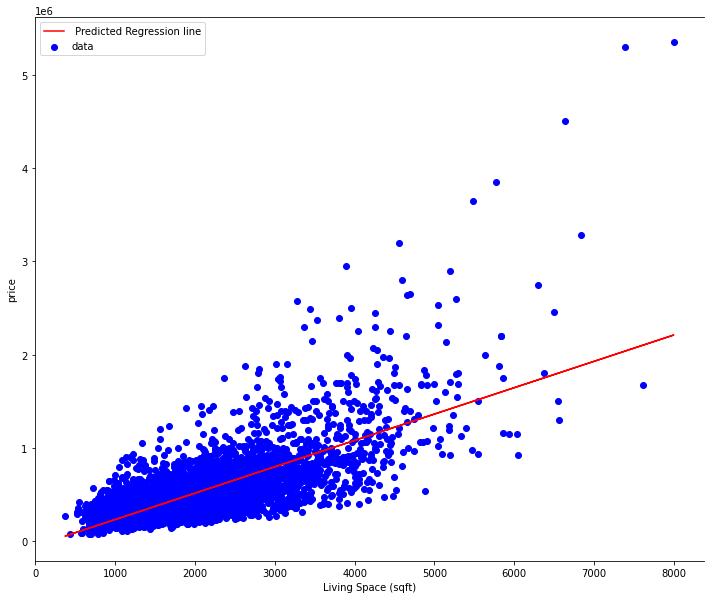

In [0]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'blue', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# **Multiple Linear Regression**
The extension to multiple and/or vector-valued predictor variables (denoted with a capital X) is known as multiple linear regression

Using the same data, now X is all features except id, price, data and Y remains the price, we split data like before but now into ratio of 70% for the training and 30% for the test.

Then the data is passed to 3 different models to find one with the best score

Firstly LinearRegression algorithm, RandomforestRegressor, It will provide 500 trees with depth of 10. and lastly using GradientBoostingRegressor with 500 trees with depth of 10, and with each algorithm we observe various accuracy scores

In [0]:
X_new= housedata.drop(['price','id','date'], axis=1)
Y_new= housedata['price']
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.3, random_state=0)


Linear Regression Mean squared error 207035.94
Linear Regression r2 score: 0.69
Accuracy score 0.7044808067489785


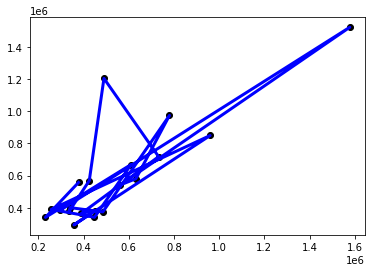

In [0]:
from sklearn.linear_model import LinearRegression

reg2 = linear_model.LinearRegression()
reg2.fit(X_train_new, Y_train_new)
Y_pred2=reg2.predict(X_test_new)
mean_squared_error=metrics.mean_squared_error(Y_test_new,Y_pred2)

print('Linear Regression Mean squared error', round(np.sqrt(mean_squared_error),2))
print('Linear Regression r2 score: %.2f' % r2_score(Y_test_new, Y_pred2))
print('Accuracy score',reg2.score(X_train_new, Y_train_new))

plt.scatter(Y_test_new[:20], Y_pred2[:20], color='black')
plt.plot(Y_test_new[:20], Y_pred2[:20], color='blue', linewidth=3)

plt.show()

RandomForestRegressor Mean squared error 132289.31
RandomForestRegressor r2 score: 0.87
RandomForestRegressor Accuracy score 0.9361981184248215


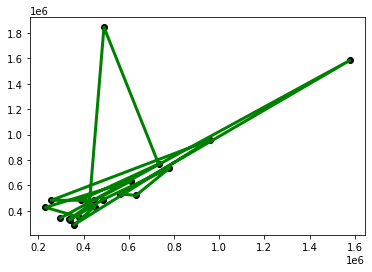

In [0]:
from sklearn import ensemble

reg3 = ensemble.RandomForestRegressor(max_depth=10, random_state=0, n_estimators=500)
reg3.fit(X_train_new, Y_train_new)
Y_pred3=reg3.predict(X_test_new)
mean_squared_error=metrics.mean_squared_error(Y_test_new,Y_pred3)

print('RandomForestRegressor Mean squared error', round(np.sqrt(mean_squared_error),2))
print('RandomForestRegressor r2 score: %.2f' % r2_score(Y_test_new, Y_pred3))
print('RandomForestRegressor Accuracy score',reg3.score(X_train_new, Y_train_new))


plt.scatter(Y_test_new[:20], Y_pred3[:20], color='black')
plt.plot(Y_test_new[:20], Y_pred3[:20], color='green', linewidth=3)

plt.show()

GradientBoostingRegressor Mean squared error 124848.27
GradientBoostingRegressor r2 score: 0.89
GradientBoostingRegressor Accuracy score 0.999078430378177


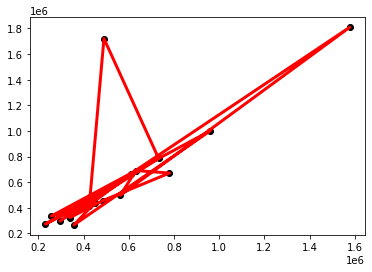

In [0]:

from sklearn import ensemble
reg4 = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 10, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')

reg4.fit(X_train_new, Y_train_new)
Y_pred4=reg4.predict(X_test_new)
mean_squared_error=metrics.mean_squared_error(Y_test_new,Y_pred4)

print('GradientBoostingRegressor Mean squared error', round(np.sqrt(mean_squared_error),2))
print('GradientBoostingRegressor r2 score: %.2f' % r2_score(Y_test_new, Y_pred4))
print('GradientBoostingRegressor Accuracy score',reg4.score(X_train_new, Y_train_new))

plt.scatter(Y_test_new[:20], Y_pred4[:20], color='black')
plt.plot(Y_test_new[:20], Y_pred4[:20], color='red', linewidth=3)

plt.show()


